# Quora Question Pair Similarity

In [1]:
import os

os.chdir('E:\Datasets\Quora Ques pair similarity')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train.csv')

In [153]:
df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [154]:
df.shape

(404290, 6)

In [155]:
print( df['question1'][0] )
print( df['question2'][0] )

What is the step by step guide to invest in share market in india?
What is the step by step guide to invest in share market?


In [156]:
df[ df['is_duplicate'] == 1 ].head()

id  qid1  qid2                                          question1  \
5    5    11    12  Astrology: I am a Capricorn Sun Cap moon and c...   
7    7    15    16                     How can I be a good geologist?   
11  11    23    24        How do I read and find my YouTube comments?   
12  12    25    26               What can make Physics easy to learn?   
13  13    27    28        What was your first sexual experience like?   

                                            question2  is_duplicate  
5   I'm a triple Capricorn (Sun, Moon and ascendan...             1  
7           What should I do to be a great geologist?             1  
11             How can I see all my Youtube comments?             1  
12            How can you make physics easy to learn?             1  
13             What was your first sexual experience?             1

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404290 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


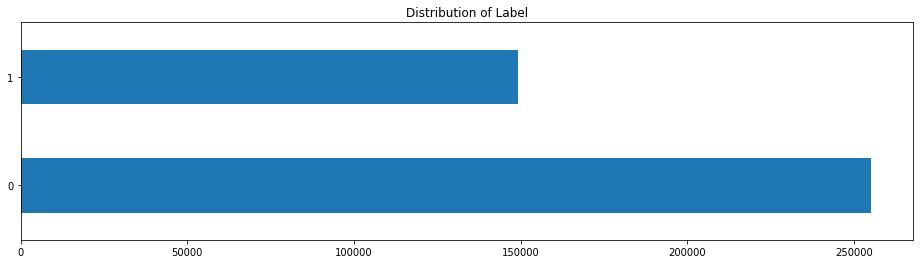

In [158]:
df['is_duplicate'].value_counts().plot(kind='barh', figsize = (16, 4))
plt.title('Distribution of Label')
plt.show()

In [159]:
print(' Total No. of Questions : ', df.shape[0] )
print(' No. of similar Questions i.e; label = 1 : ', len( df[ df['is_duplicate'] == 1 ] ) )
print(' No. of non-similar    Questions i.e; label = 0 : ', len( df[ df['is_duplicate'] == 0 ] )  )

 Total No. of Questions :  404290
 No. of similar Questions i.e; label = 1 :  149263
 No. of non-similar    Questions i.e; label = 0 :  255027


In [160]:
import numpy as np

dup = np.round(  len( df[ df['is_duplicate'] == 1 ] ) / df.shape[0] * 100 )
uni = np.round( len( df[ df['is_duplicate'] == 0 ] ) / df.shape[0] * 100 )
print(' %age of similar Ques. : ', dup )
print(' %age of non-similar Ques. : ', uni )

 %age of similar Ques. :  37.0
 %age of non-similar Ques. :  63.0


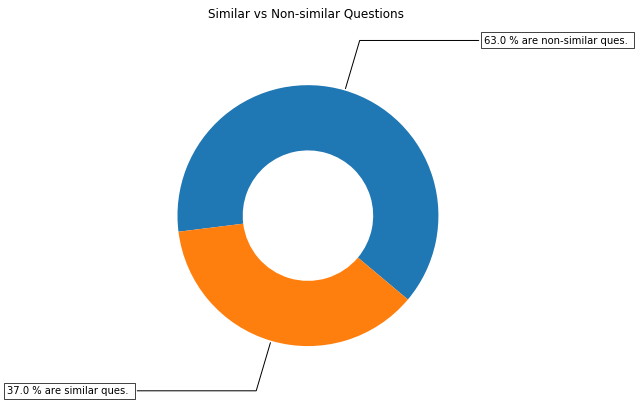

In [161]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 6), subplot_kw=dict(aspect="equal"))  # change here on figsize

str1 = str( dup ) + ' % are similar ques. '
str2 = str( uni ) + ' % are non-similar ques. '

recipe = [str2, str1]     # change here 

data = [ len( df[ df['is_duplicate'] == 0 ] ), len( df[ df['is_duplicate'] == 1 ] ) ]         # change here

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Similar vs Non-similar Questions \n\n")

plt.show()

# Ref : https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


In [162]:
# Unique and Repeated Ques

qids = pd.Series( df['qid1'].tolist() + df['qid2'].tolist() )

uniQid = len( np.unique( qids ) )
print( ' No. of unique Question : ', uniQid )

repeatQid = np.sum( qids.value_counts() > 1 )
print( ' No. of Question appeared more than once : ', repeatQid )

print (' Max number of times a single question is repeated:', max( qids.value_counts() ) ) 


 No. of unique Question :  537933
 No. of Question appeared more than once :  111780
 Max number of times a single question is repeated: 157


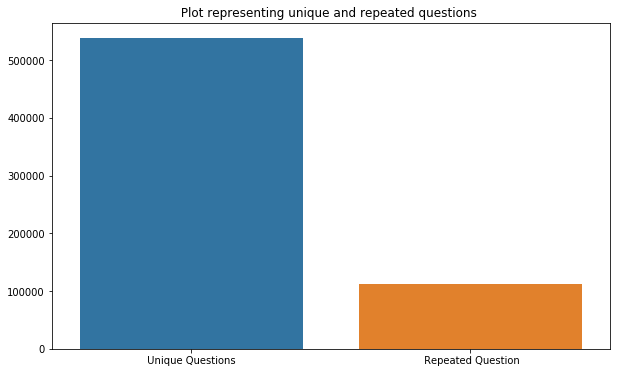

In [163]:
import seaborn as sns

x = [" Unique Questions " , " Repeated Question"]
y =  [ uniQid , repeatQid ]

plt.figure( figsize=(10, 6) )
plt.title (" Plot representing unique and repeated questions  ")
sns.barplot( x, y)
plt.show()

In [164]:
# Checking whether there are any repeated pair of questions

dupli = df[ ['qid1','qid2','is_duplicate'] ].groupby( ['qid1','qid2'] ).count().shape
print( dupli )
print( df.shape )

(404290, 1)
(404290, 6)


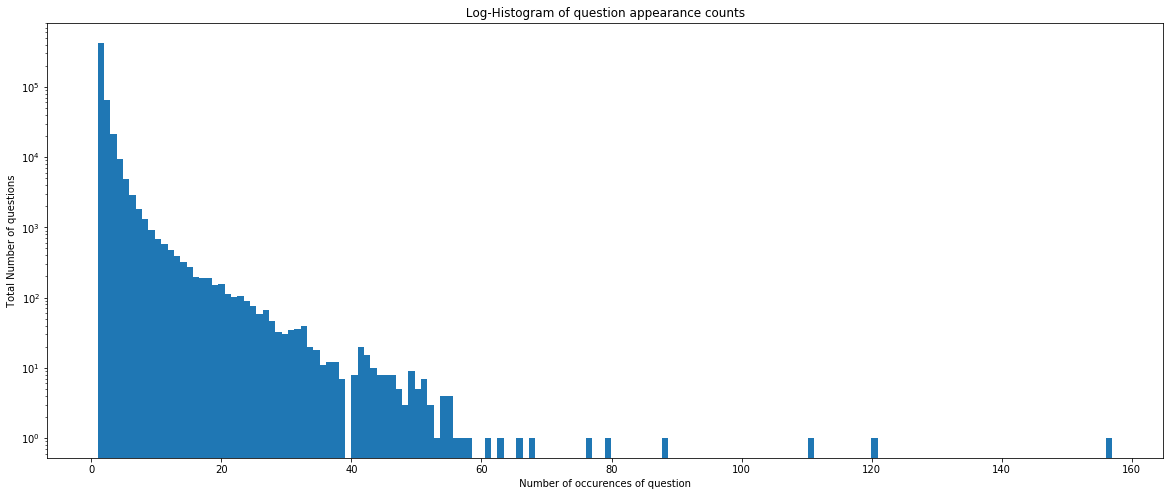

In [165]:
plt.figure( figsize=(20, 8) )

plt.hist( qids.value_counts(), bins=160 )

plt.yscale('log', nonposy='clip')

plt.title(' Log-Histogram of question appearance counts ')

plt.xlabel(' Number of occurences of question ')

plt.ylabel(' Total Number of questions ')

plt.show()

In [166]:
df[ df.isnull().any(1) ]   # Returns any NAN value in the dataframe

id    qid1    qid2                         question1 question2  \
105780  105780  174363  174364    How can I develop android app?       NaN   
201841  201841  303951  174364  How can I create an Android app?       NaN   

        is_duplicate  
105780             0  
201841             0

In [167]:
df = df.fillna('') # Filling NAN cells with <blank space>

df[ df.isnull().any(1) ]

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []

## Feature Extraction

In [168]:
# Grouping qid1 and counting their frequency 
df.groupby('qid1')['qid1'].transform('count')[0:10]

# transform : Call func on self producing a DataFrame with transformed values and that has the same axis length as self.

0    1
1    4
2    1
3    1
4    3
5    1
6    1
7    1
8    1
9    1
Name: qid1, dtype: int64

In [169]:
df['freqQid1'] = df.groupby('qid1')['qid1'].transform('count')
df['freqQid2'] = df.groupby('qid2')['qid2'].transform('count')

In [170]:
df.head(2)

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   

                                           question2  is_duplicate  freqQid1  \
0  What is the step by step guide to invest in sh...             0         1   
1  What would happen if the Indian government sto...             0         4   

   freqQid2  
0         1  
1         1

In [171]:
# length of each question 
df['question1'].str.len()[0:5]

0    66
1    51
2    73
3    50
4    76
Name: question1, dtype: int64

In [172]:
df['lenQ1'] = df['question1'].str.len()
df['lenQ2'] = df['question2'].str.len()

df.head(2)

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   

                                           question2  is_duplicate  freqQid1  \
0  What is the step by step guide to invest in sh...             0         1   
1  What would happen if the Indian government sto...             0         4   

   freqQid2  lenQ1  lenQ2  
0         1     66     57  
1         1     51     88

In [173]:
# No. of words in a Question
df['question1'].apply( lambda row : len( row.split(" ") ))[0:5]

0    14
1     8
2    14
3    11
4    13
Name: question1, dtype: int64

In [174]:
df['wordQ1'] = df['question1'].apply( lambda row : len( row.split(" ") ))
df['wordQ2'] = df['question2'].apply( lambda row : len( row.split(" ") ))

df.head(2)

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   

                                           question2  is_duplicate  freqQid1  \
0  What is the step by step guide to invest in sh...             0         1   
1  What would happen if the Indian government sto...             0         4   

   freqQid2  lenQ1  lenQ2  wordQ1  wordQ2  
0         1     66     57      14      12  
1         1     51     88       8      13

In [175]:
# Sets
q1 = (1,2,3,1,1,1)
q1 = set(q1)
q1

{1, 2, 3}

In [176]:
# Undersatnding map( )
# The map() function applies a given function to each item of an iterable (list, tuple..) and returns a list of the results.

def calculateSquare(n):
    return n*n

numbers = (1, 2, 3, 4)
result = map(calculateSquare, numbers)
print( result )

result = set( map(calculateSquare, numbers) )
print( result )

# Attributes are func and iteratable
# function : map() passes each item of the iterable to this function.
# iterable : iterable which is to be mapped

{16, 1, 4, 9}


In [177]:
# Using map() with lambda function
numbers = (1, 2, 3, 4)
result = map(lambda x: x*x, numbers)
print(result)
# Here lambda is a function and numbers is the iterable

numbersSquare = set(result)
print(numbersSquare)

{16, 1, 4, 9}


In [178]:
def commonWord( row ):
    
    w1 = set( map ( lambda word: word.lower().strip(), row['question1'].split(" ")) )
    w2 = set( map ( lambda word: word.lower().strip(), row['question2'].split(" ")) ) 
    # The map() function applies a given function to each item of an iterable (list, tuple..) and returns a list of the results.

    return 1.0 * len(w1 & w2)
    

a = df.apply( commonWord, axis=1 )

df['commonWord'] = df.apply( commonWord, axis=1)

# df.apply() : Apply a function along an axis of the DataFrame.
# axis :  {0 or ‘index’, 1 or ‘columns’}, default 0 Axis along which the function is applied
# 0 or ‘index’: apply function to each column. 1 or ‘columns’: apply function to each row.

In [179]:
def totalWord( row ):
        w1 = set( map ( lambda word: word.lower().strip(), row['question1'].split(" ")) )
        w2 = set( map ( lambda word: word.lower().strip(), row['question2'].split(" ")) )    
        return 1.0 * (len(w1) + len(w2))

df['totalWords'] = df.apply( totalWord, axis=1 )

def shareWord( row ):  
    w1 = set( map ( lambda word: word.lower().strip(), row['question1'].split(" ")) )
    w2 = set( map ( lambda word: word.lower().strip(), row['question2'].split(" ")) )    
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))

df['shareWord'] = df.apply( shareWord, axis=1 )

In [180]:
df['fQ1+fQ2'] = df['freqQid1'] + df['freqQid2']
df['fQ1-fQ2'] = abs( df['freqQid1'] - df['freqQid2'] ) # abs() of  | 1 - 8 | = 7

In [181]:
df.head(2)

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   

                                           question2  is_duplicate  freqQid1  \
0  What is the step by step guide to invest in sh...             0         1   
1  What would happen if the Indian government sto...             0         4   

   freqQid2  lenQ1  lenQ2  wordQ1  wordQ2  commonWord  totalWords  shareWord  \
0         1     66     57      14      12        10.0        23.0   0.434783   
1         1     51     88       8      13         4.0        20.0   0.200000   

   fQ1+fQ2  fQ1-fQ2  
0        2        0  
1        5        3

<b>Where:</b>

 freqQid1   =  Frequency of qid1's <br>
 freqQid2   =  Frequency of qid2's <br>
 lenQ1      =  Length of q1 <br> 
 lenQ2      =  Length of q2 <br>
 wordQ1     =  Number of words in Question 1 <br>
 wordQ2     =  Number of words in Question 2 <br>
 commonWord =  (Number of common unique words in Question 1 and Question 2) <br>
 totalWords =  (Total num of words in Question 1 + Total num of words in Question 2) <br>
 shareWord  =  ( commomWord) / ( totalWords )  <br>
 fQ1 + fQ2  =   sum total of frequency of qid1 and qid2  <br>
 fQ1 - fQ2  =   absolute difference of frequency of qid1 and qid2  <br>

### question1 & question2

In [182]:
print (" Min length of the questions in question1 : " , min( df['wordQ1'] ))
print (" Min length of the questions in question2 : " , min( df['wordQ2'] ))
print()
print (" No. of Ques with min length [question1] : ", df[ df['wordQ1'] == 1 ].shape[0])
print (" No. of Ques with min length [question2] : ", df[ df['wordQ2'] == 1 ].shape[0])

 Min length of the questions in question1 :  1
 Min length of the questions in question2 :  1

 No. of Ques with min length [question1] :  67
 No. of Ques with min length [question2] :  24


In [183]:
print (" Max length of the questions in question1 : " , max( df['wordQ1'] ))
print (" Max length of the questions in question2 : " , max( df['wordQ2'] ))
print()
print (" No. of Ques with max length [question1] : ", df[ df['wordQ1'] == 125 ].shape[0])
print (" No. of Ques with max length [question2] : ", df[ df['wordQ2'] == 237 ].shape[0])

 Max length of the questions in question1 :  125
 Max length of the questions in question2 :  237

 No. of Ques with max length [question1] :  1
 No. of Ques with max length [question2] :  13


In [184]:
print(' Mean length of questions in question1 : ', df['wordQ1'].mean() )
print(' Mean length of questions in question2 : ', df['wordQ2'].mean() )

 Mean length of questions in question1 :  10.94459175344431
 Mean length of questions in question2 :  11.185119592371812


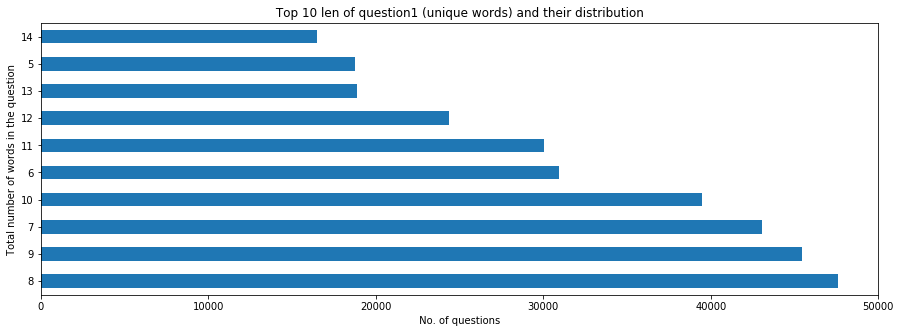

In [185]:
plt.figure( figsize = (15,5) )

df['wordQ1'].value_counts()[0:10].plot(kind = 'barh')
plt.xlabel(' No. of questions ')
plt.ylabel(' Total number of words in the question ')
plt.title(' Top 10 len of question1 (unique words) and their distribution ')
plt.show()

Highest number of questions in question1 have 8 words in them

Mean length of questions in question1 :  10.94459175344431

Min length of the questions in question1 :  1

No. of Ques with min length [question1] :  67

Max length of the questions in question1 :  125

No. of Ques with max length [question1] :  1


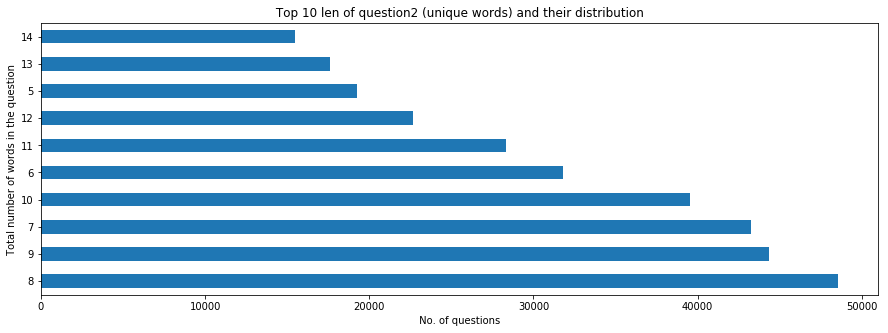

In [186]:
plt.figure( figsize = (15,5) )

df['wordQ2'].value_counts()[0:10].plot(kind = 'barh')
plt.xlabel(' No. of questions ')
plt.ylabel(' Total number of words in the question ')
plt.title(' Top 10 len of question2 (unique words) and their distribution ')
plt.show()

Highest number of questions in question2 have 8 words in them
    
Mean length of questions in question2 :  11.185119592371812

Min length of the questions in question2 :  1

No. of Ques with min length [question2] :  24

Max length of the questions in question2 :  237

No. of Ques with max length [question2] :  13

### shareWord

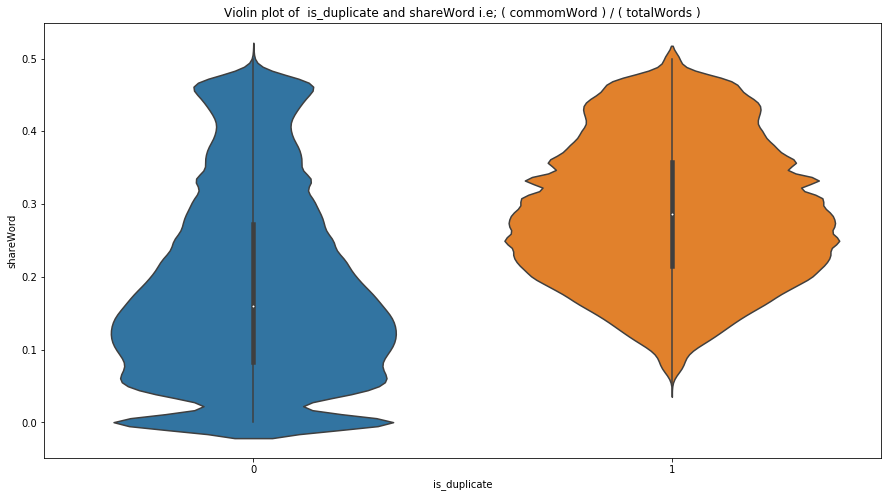

In [187]:
plt.figure(figsize=(15, 8)) # shareWord = ( commomWord ) / ( totalWords ) 
sns.violinplot(x = 'is_duplicate', y = 'shareWord', data = df)
plt.title('Violin plot of  is_duplicate and shareWord i.e; ( commomWord ) / ( totalWords )')
plt.show()

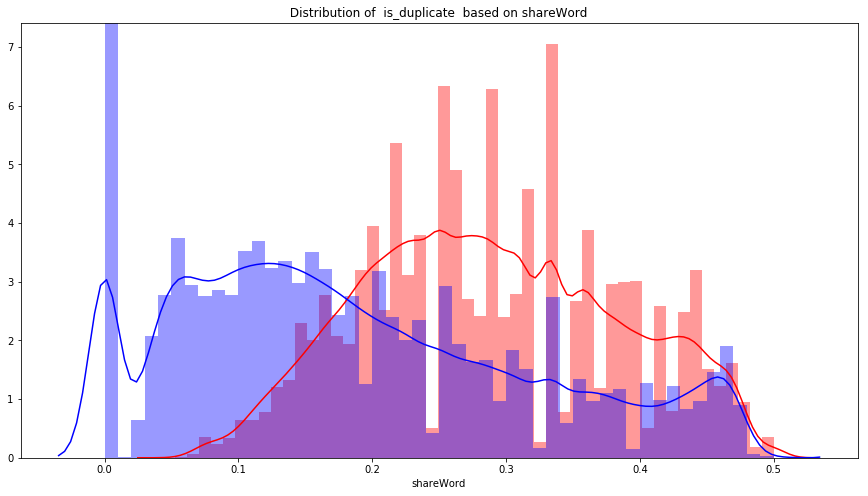

In [188]:
plt.figure( figsize=(15, 8) ) 

sns.distplot( df[ df['is_duplicate'] == 1 ]['shareWord'] , label = "1", color = 'red' )
sns.distplot( df[ df['is_duplicate'] == 0 ]['shareWord'] , label = "0", color = 'blue' )
plt.title(' Distribution of  is_duplicate  based on shareWord ')
plt.show()

### commonWord

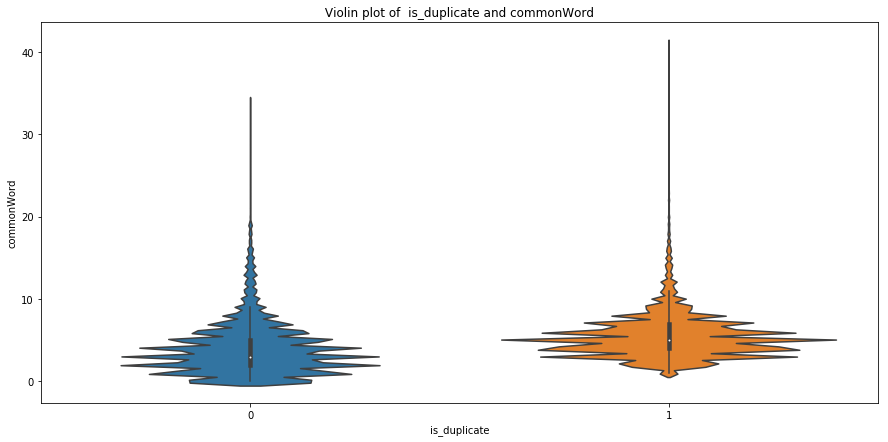

In [189]:
plt.figure(figsize=(15, 7))

sns.violinplot(x = 'is_duplicate', y = 'commonWord', data = df )
plt.title(' Violin plot of  is_duplicate and commonWord ')

plt.show()

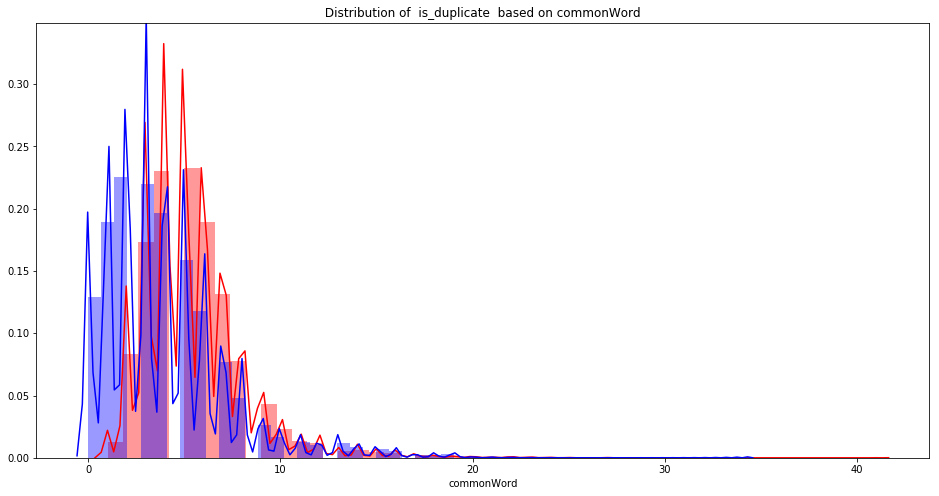

In [190]:
plt.figure(figsize=(16, 8))

sns.distplot( df[ df['is_duplicate'] == 1 ]['commonWord'] , label = "1", color = 'red')
sns.distplot( df[ df['is_duplicate'] == 0 ]['commonWord'] , label = "0" , color = 'blue' )
plt.title(' Distribution of  is_duplicate  based on commonWord ')
plt.show()

## Data Processing

In [191]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

In [192]:
# To get the results in 4 decemal points
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")



In [193]:
pattern = re.compile('\W')
print( pattern )

ex = BeautifulSoup('apple is good', "lxml")
print(ex)
ex = ex.get_text()
print(ex)

x = 'delicious'
porter = PorterStemmer()
x = porter.stem(x)
print(x)

re.compile('\\W')
<html><body><p>apple is good</p></body></html>
apple is good
delici


In [194]:
def preprocess(x):
    
    x = str(x).lower()
    
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
                            
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    
    pattern = re.compile('\W')
    
    if type(x) == type(''):  # if str == str
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        #example1 = BeautifulSoup(x)
        #x = example1.get_text()
               
    
    return x

In [195]:
tokenf = [0.0] * 10
tokenf

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

## Advanced Feature Extraction

In [196]:
def tokenF(q1, q2):
    
    tokenFeatures = [0.0] * 10  # list of no. of token features 10 here
    
    # Converting the Sentence into Tokens: 
    q1Tokens = q1.split()
    q2Tokens = q2.split()

    if len( q1Tokens ) == 0 or len( q2Tokens ) == 0: # i,e; if ques are empty
        return tokenf
    
    # Non-stopwords in Questions
    q1Words = set( [ word for word in q1Tokens if word not in STOP_WORDS ] ) # word
    q2Words = set( [ word for word in q2Tokens if word not in STOP_WORDS ] )
    
    # Stopwords in Questions
    q1Stops = set( [ word for word in q1Tokens if word in STOP_WORDS ] )  # stop words
    q2Stops = set( [ word for word in q2Tokens if word in STOP_WORDS ] )
    
    # Common non-stopwords from Question pair
    commonWordCount = len( q1Words.intersection( q2Words ) )
    
    # Common stopwords from Question pair
    commonStopCount = len( q1Stops.intersection( q2Stops ) )
    
    # Common Tokens from Question pair
    commonTokenCount = len( set(q1Tokens).intersection( set(q2Tokens) ))
    
    
    tokenFeatures[0] = commonWordCount / ( min(  len(q1Words), len(q2Words)) + SAFE_DIV) # SaFE_DIV : to get result in 4 points
    tokenFeatures[1] = commonWordCount / ( max(  len(q1Words), len(q2Words)) + SAFE_DIV)
    tokenFeatures[2] = commonStopCount / ( min(  len(q1Stops), len(q2Stops)) + SAFE_DIV)
    tokenFeatures[3] = commonStopCount / ( max(  len(q1Stops), len(q2Stops)) + SAFE_DIV)
    tokenFeatures[4] = commonTokenCount / ( min(  len(q1Tokens), len(q2Tokens)) + SAFE_DIV)
    tokenFeatures[5] = commonTokenCount / ( max(  len(q1Tokens), len(q2Tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    tokenFeatures[6] = int( q1Tokens[-1] == q2Tokens[-1] )
    
    # First word of both question is same or not
    tokenFeatures[7] = int( q1Tokens[0] == q2Tokens[0] )
    
    tokenFeatures[8] = abs( len(q1Tokens) - len(q2Tokens) )
    
    #Average Token Length of both Questions
    tokenFeatures[9] = ( len(q1Tokens) + len(q2Tokens) ) / 2
   
    return tokenFeatures



token features:
- 0 __cwc_min__ :  Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br>cwc_min = commonWordCount /  min(  len(q1Words), len(q2Words))
<br>
<br>
- 1 __cwc_max__ :  Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>cwc_max = commonWordCount /  max(  len(q1Words), len(q2Words))
<br>
<br>
- 2 __csc_min__ :  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br> csc_min = commonStopCount / min(  len(q1Stops), len(q2Stops))
<br>
<br>
- 3 __csc_max__ :  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br>csc_max = commonStopCount /  max(  len(q1Stops), len(q2Stops))
<br>
<br>
- 4 __ctc_min__ :  Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br>ctc_min = commonTokenCount / min(  len(q1Tokens), len(q2Tokens))
<br>
<br>

- 5 __ctc_max__ :  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br>ctc_max = commonTokenCount / max(  len(q1Tokens), len(q2Tokens))
<br>
<br>
        
- 6 __last_word_eq__ :  Check if First word of both questions is equal or not<br>last_word_eq = int( q1Tokens[-1] == q2Tokens[-1] )
<br>
<br>

- 7 __first_word_eq__ :  Check if First word of both questions is equal or not<br>first_word_eq = int( q1Tokens[0] == q2Tokens[0] )
<br>
<br>
        
- 8 __abs_len_diff__ :  Abs. length difference<br>abs_len_diff = abs( len(q1Tokens) - len(q2Tokens) )
<br>
<br>

- 9  __mean_len__ :  Average Token Length of both Questions<br>mean_len = ( len(q1Tokens) + len(q2Tokens) ) / 2
<br>
<br>


In [197]:
import distance  # pip install distance

a = 'abccccdef'
b = 'abcqweccccedccc'
strs = list( distance.lcsubstrings(a, b) )
print( strs )
len( strs[0] ) / ( min( len(a), len(b) ) + 1 )

['cccc']


0.4

In [198]:
# Longest Common sub string

def longestSubratio(a, b):
    
    strs = list( distance.lcsubstrings(a, b) )
    if len( strs ) == 0:
        return 0
    else:
        return len( strs[0] ) / ( min( len(a), len(b) ) + 1 )

In [199]:
from fuzzywuzzy import fuzz    # pip install fuzzywuzzy # pip install python-Levenshtein

def featureExtraction( df ):
    
    # preprocessing each question
    df["question1"] = df["question1"].fillna('').apply(preprocess) # preprocess() func call
    df["question2"] = df["question2"].fillna('').apply(preprocess)

    
    # Merging Features with dataset
    
    tokenFeatures = df.apply( lambda x: tokenF( x["question1"], x["question2"] ), axis=1)
    
    df["cwc_min"]       = list( map( lambda x: x[0], tokenFeatures) ) #Here labmda func is func and tokenFeatures is iterable
    df["cwc_max"]       = list( map( lambda x: x[1], tokenFeatures) )
    df["csc_min"]       = list( map( lambda x: x[2], tokenFeatures) )
    df["csc_max"]       = list( map( lambda x: x[3], tokenFeatures) )
    df["ctc_min"]       = list( map( lambda x: x[4], tokenFeatures) )
    df["ctc_max"]       = list( map( lambda x: x[5], tokenFeatures) )
    df["last_word_eq"]  = list( map( lambda x: x[6], tokenFeatures) )
    df["first_word_eq"] = list( map( lambda x: x[7], tokenFeatures) )
    df["abs_len_diff"]  = list( map( lambda x: x[8], tokenFeatures) )
    df["mean_len"]      = list( map( lambda x: x[9], tokenFeatures) )
   
    
    # Computing Fuzzy Features and Merging with Dataset ( see Ref )
    
    df["token_set_ratio"]       = df.apply( lambda x: fuzz.token_set_ratio( x['question1'], x['question2'] ), axis=1)
    df["token_sort_ratio"]      = df.apply( lambda x: fuzz.token_sort_ratio( x['question1'], x['question2'] ), axis=1)
    df["fuzz_ratio"]            = df.apply( lambda x: fuzz.QRatio( x['question1'], x['question2'] ), axis=1)
    df["fuzz_partial_ratio"]    = df.apply( lambda x: fuzz.partial_ratio( x['question1'], x['question2'] ), axis=1)
    df["longest_substr_ratio"]  = df.apply( lambda x: longestSubratio( x['question1'], x['question2'] ), axis=1)
    
    return df

# Ref : https://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/ 
# Ref : https://github.com/seatgeek/fuzzywuzzy

__longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br>longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))


In [3]:
from datetime import datetime

In [201]:
# Run only once 
start = datetime.now()

df = featureExtraction( df )

print("Time taken to run this cell :", datetime.now() - start )

Time taken to run this cell : 0:07:26.706475


In [204]:
df.head(2)

id  qid1  qid2                                          question1  \
0   0     1     2  what is the step by step guide to invest in sh...   
1   1     3     4  what is the story of kohinoor  koh i noor  dia...   

                                           question2  is_duplicate  freqQid1  \
0  what is the step by step guide to invest in sh...             0         1   
1  what would happen if the indian government sto...             0         4   

   freqQid2  lenQ1  lenQ2          ...            ctc_max  last_word_eq  \
0         1     66     57          ...           0.785709           0.0   
1         1     51     88          ...           0.466664           0.0   

   first_word_eq  abs_len_diff  mean_len  token_set_ratio  token_sort_ratio  \
0            1.0           2.0      13.0              100                93   
1            1.0           5.0      12.5               86                63   

   fuzz_ratio  fuzz_partial_ratio  longest_substr_ratio  
0          93                 100              0.982759  
1          66                  75              0.596154  

[2 rows x 32 columns]

In [205]:
df.shape

(404290, 32)

In [206]:
df.to_csv("nlpfeatTrain.csv", index=False, encoding='utf-8' )

In [4]:
df = pd.read_csv('nlpfeatTrain.csv')
df.head(2)

id  qid1  qid2                                          question1  \
0   0     1     2  what is the step by step guide to invest in sh...   
1   1     3     4  what is the story of kohinoor  koh i noor  dia...   

                                           question2  is_duplicate  freqQid1  \
0  what is the step by step guide to invest in sh...             0         1   
1  what would happen if the indian government sto...             0         4   

   freqQid2  lenQ1  lenQ2          ...            ctc_max  last_word_eq  \
0         1     66     57          ...           0.785709           0.0   
1         1     51     88          ...           0.466664           0.0   

   first_word_eq  abs_len_diff  mean_len  token_set_ratio  token_sort_ratio  \
0            1.0           2.0      13.0              100                93   
1            1.0           5.0      12.5               86                63   

   fuzz_ratio  fuzz_partial_ratio  longest_substr_ratio  
0          93                 100              0.982759  
1          66                  75              0.596154  

[2 rows x 32 columns]

In [58]:
a = np.array((1,2,3))
b = np.array((2,3,4))
print( np.dstack((a,b)) )

print( np.dstack((a,b)).flatten() )
# dstack : Stack arrays in sequence depth wise (along third axis)

[[[1 2]
  [2 3]
  [3 4]]]
[1 2 2 3 3 4]


In [59]:
dfDupli = df[ df['is_duplicate'] == 1 ]
dfNonDupli = df[ df['is_duplicate'] == 0 ]

D = np.dstack( [ dfDupli["question1"], dfDupli["question2"] ]).flatten()
notD = np.dstack( [ dfNonDupli["question1"], dfNonDupli["question2"] ]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len( D ))
print ("Number of data points in class 0 (non duplicate pairs) :",len( notD ))

Number of data points in class 1 (duplicate pairs) : 298526
Number of data points in class 0 (non duplicate pairs) : 510054


In [61]:
print( D[20:30] )

['what are some special cares for someone with a nose that gets stuffy during the night '
 'how can i keep my nose from getting stuffy at night '
 'what game of thrones villain would be the most likely to give you mercy '
 'what game of thrones villain would you most like to be at the mercy of '
 'how do we prepare for upsc ' 'how do i prepare for civil service '
 'what are some examples of products that can be make from crude oil '
 'what are some of the products made from crude oil '
 'how do i make friends ' 'how to make friends  ']


In [62]:
print( notD[20:30] )

['why do girls want to be friends with the guy they reject '
 'how do guys feel after rejecting a girl '
 'which is the best digital marketing institution in banglore '
 'which is the best digital marketing institute in pune '
 'what is causing someone to be jealous '
 'what can i do to avoid being jealous of someone '
 'what are the questions should not ask on quora '
 'which question should i ask on quora ' 'how much is 30 kv in hp '
 'where can i find a conversion chart for cc to horsepower ']


In [67]:
# Saving the np array into a text file

np.savetxt('trainD.txt', D, delimiter=' ', fmt='%s', encoding='utf-8')
np.savetxt('trainNotD.txt', notD, delimiter=' ', fmt='%s', encoding='utf-8')

# delimiter : str, optional String or character separating columns.
# fmt : str or sequence of strs, optional A single format (%10.5f),a sequence of formats, or a multi-format string, 
# e.g. ‘Iteration %d – %10.5f’, in which case delimiter is ignored. 

In [71]:
textD = open( 'trainD.txt', encoding='utf=8').read()
textNotD = open( 'trainNotD.txt', encoding='utf=8').read()

print (" Total number of words in duplicate pair questions : ",len(textD))
print (" Total number of words in non duplicate pair questions :",len(textNotD))

 Total number of words in duplicate pair questions :  16110077
 Total number of words in non duplicate pair questions : 33193621


In [74]:
stopwords = set(STOP_WORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.remove("not")

stopwords.remove("no")
#stopwords.remove("good")
#stopwords.remove("love")
#stopwords.remove("like")
#stopwords.remove("best")

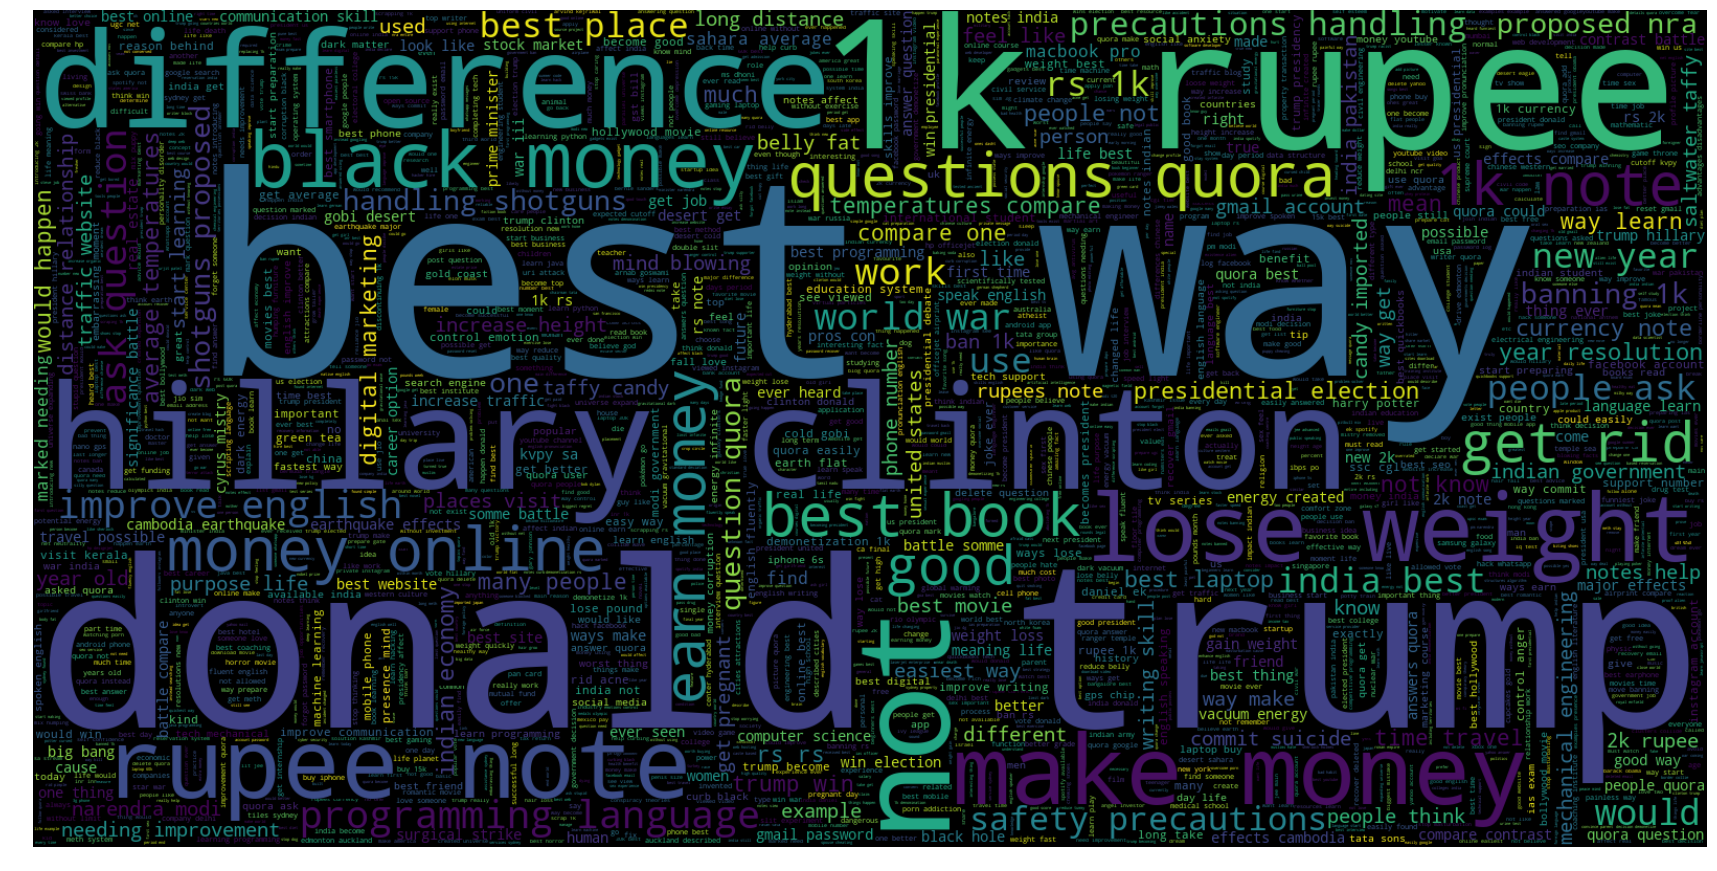

In [77]:
# Plotting word cloud
from wordcloud import WordCloud

wordcloud = WordCloud( max_words = len(textD), stopwords=stopwords, background_color='black', width=1600, height=800 )
wordcloud.generate( textD )

fig = plt.figure( figsize=(30,20) )
plt.imshow( wordcloud, interpolation='bilinear' )
plt.axis('off')
plt.show()

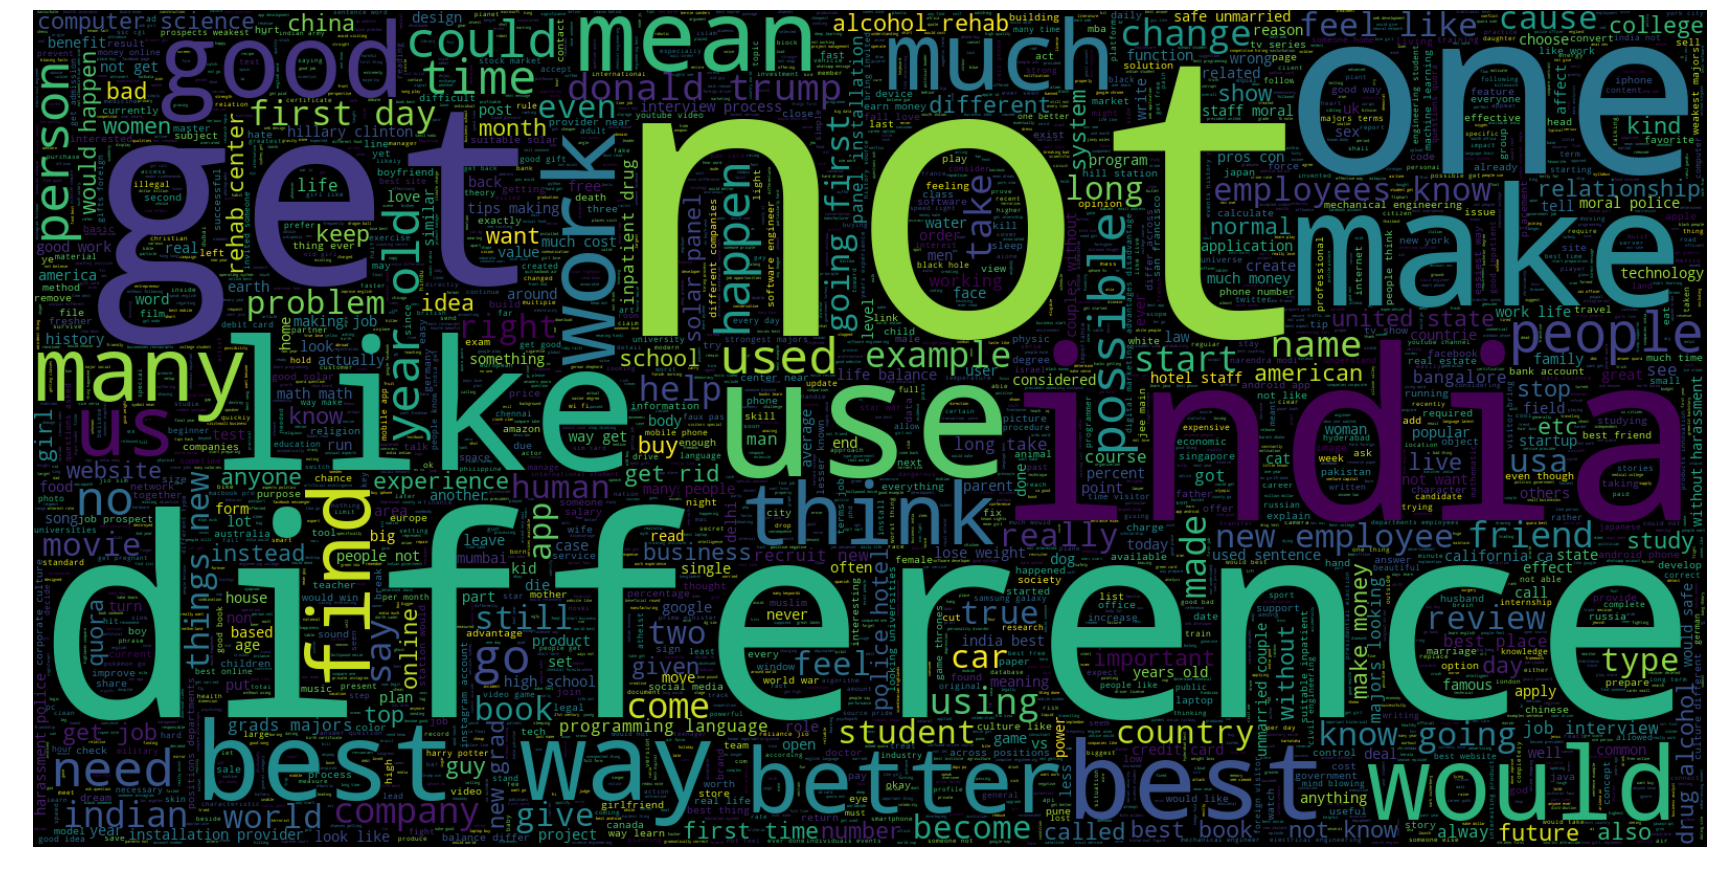

In [78]:
wordcloud = WordCloud( max_words = len(textNotD), stopwords=stopwords, background_color='black', width=1600, height=800 )
wordcloud.generate( textNotD )

fig = plt.figure( figsize=(30,20) )
plt.imshow( wordcloud, interpolation='bilinear' )
plt.axis('off')
plt.show()

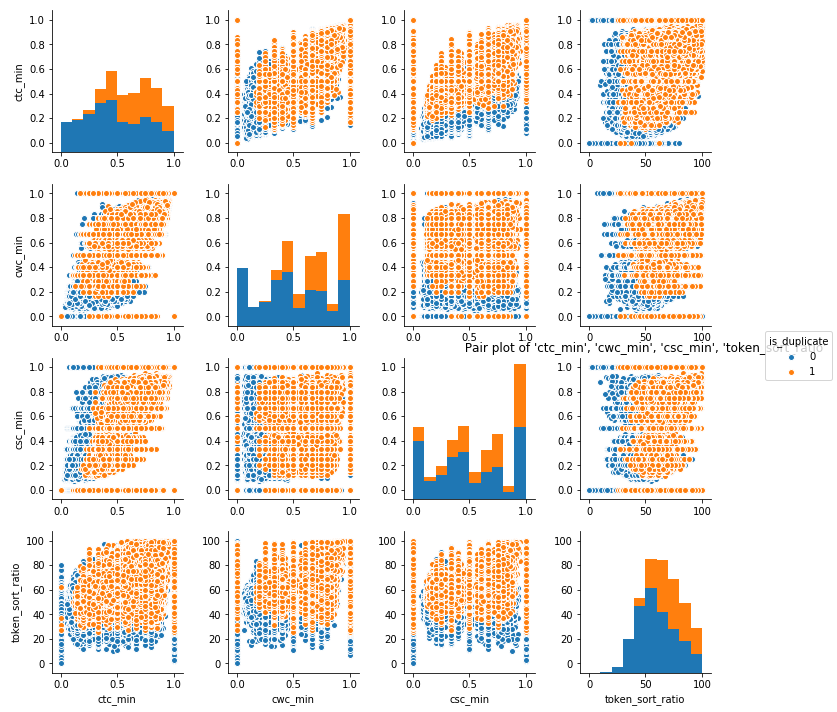

In [81]:
#plt.figure( figsize=(30,20) )
sns.pairplot( df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']], hue='is_duplicate', \
               vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

### token_sort_ratio

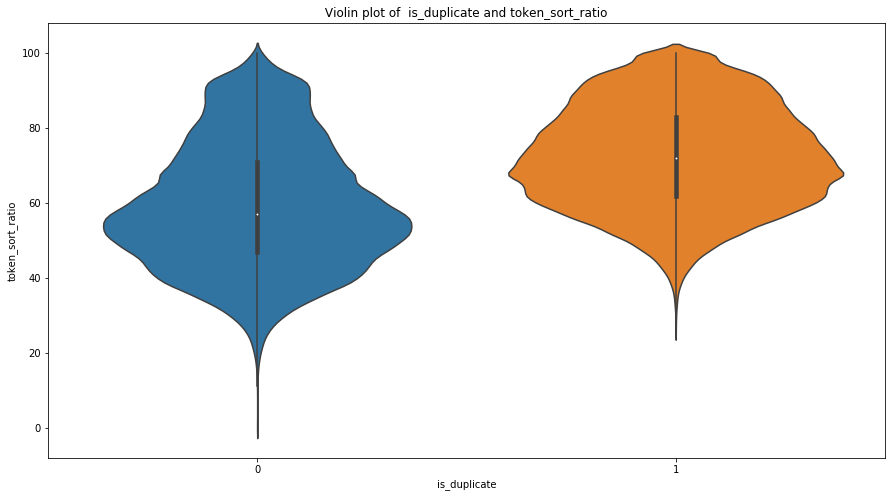

In [86]:
plt.figure( figsize = (15, 8) )
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = df  )

plt.title(' Violin plot of  is_duplicate and token_sort_ratio ')
plt.show()

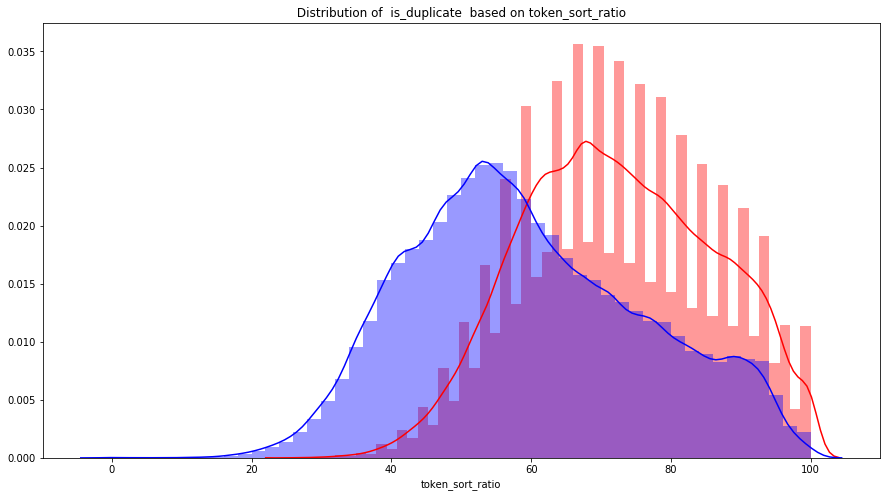

In [85]:
plt.figure( figsize = (15, 8) )

sns.distplot( df[ df['is_duplicate'] == 1 ]['token_sort_ratio'], label = "1", color = 'red')
sns.distplot( df[ df['is_duplicate'] == 0 ]['token_sort_ratio'] , label = "0" , color = 'blue' )

plt.title(' Distribution of  is_duplicate  based on token_sort_ratio ')
plt.show()

### fuzz_ratio

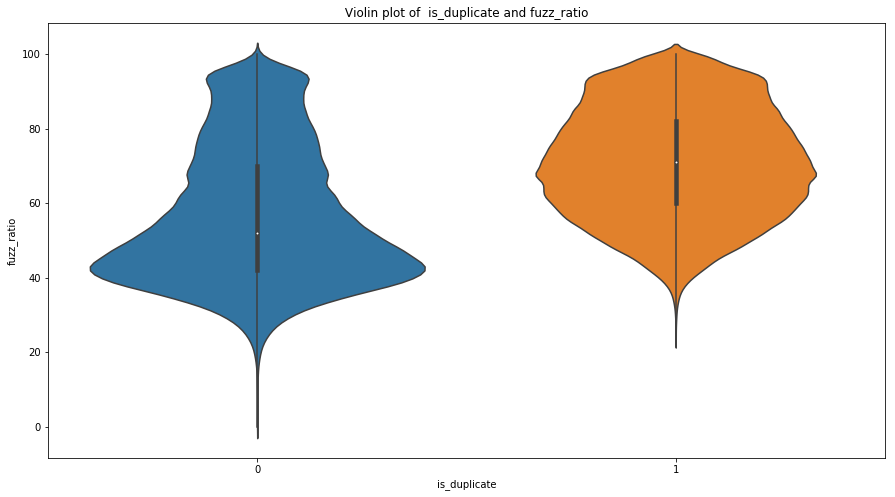

In [87]:
plt.figure( figsize = (15, 8) )

sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = df )

plt.title(' Violin plot of  is_duplicate and fuzz_ratio ')
plt.show()

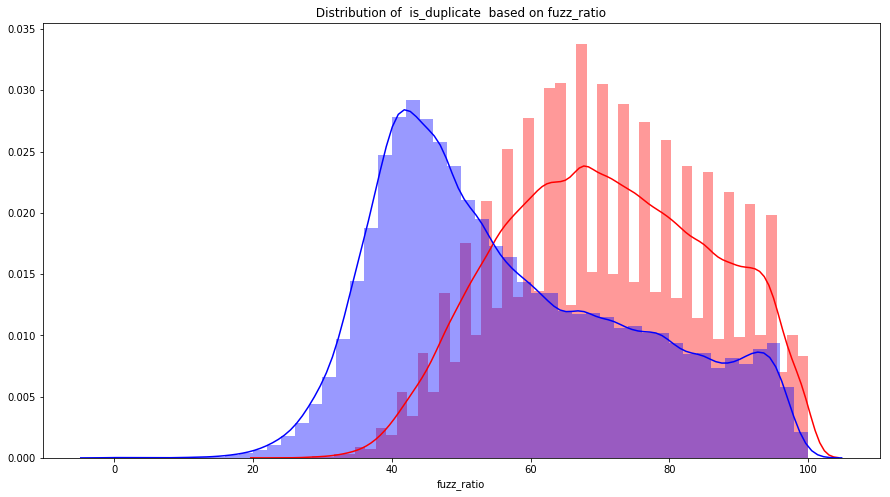

In [88]:
plt.figure( figsize = (15, 8) )

sns.distplot( df[ df['is_duplicate'] == 1 ]['fuzz_ratio'], label = "1", color = 'red')
sns.distplot( df[ df['is_duplicate'] == 0 ]['fuzz_ratio'] , label = "0" , color = 'blue' )

plt.title(' Distribution of  is_duplicate  based on fuzz_ratio ')
plt.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler

dfSample = df[0:5000]

m = MinMaxScaler()
X = m.fit_transform( dfSample[ ['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq',\
                                'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,\
                                'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']] )

y = dfSample['is_duplicate'].values

In [6]:
print( type( X ) )
print( X.shape )
X[10]

<class 'numpy.ndarray'>
(5000, 15)


array([0.        , 0.        , 0.49997833, 0.11111089, 0.11111043,
       0.05263165, 0.        , 0.        , 0.04950495, 0.10687023,
       0.4       , 0.36      , 0.36      , 0.18309859, 0.04303026])

In [7]:
print( type( y ) )
print( y.shape )
print( y[10:40] )

<class 'numpy.ndarray'>
(5000,)
[0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0]


In [97]:
from sklearn.manifold import TSNE

tsne = TSNE( n_components=2, init='random', random_state=101, method='barnes_hut', n_iter=1000, verbose=2, angle=0.5 )
tsne2d = tsne.fit_transform( X )

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.045s...
[t-SNE] Computed neighbors for 5000 samples in 0.414s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.121373
[t-SNE] Computed conditional probabilities in 0.246s
[t-SNE] Iteration 50: error = 81.0523758, gradient norm = 0.0426766 (50 iterations in 7.667s)
[t-SNE] Iteration 100: error = 70.5016251, gradient norm = 0.0100098 (50 iterations in 5.399s)
[t-SNE] Iteration 150: error = 68.7261505, gradient norm = 0.0067236 (50 iterations in 5.474s)
[t-SNE] Iteration 200: error = 67.9294662, gradient norm = 0.0040007 (50 iterations in 5.338s)
[t-SNE] Iteration 250: error = 67.4574203, gradient norm = 0.0031076

In [98]:
df1 = pd.DataFrame({'x': tsne2d[:,0], 'y': tsne2d[:,1] ,'label': y})
df1.head()

label          x          y
0      0 -24.969496 -52.940292
1      0  -8.957891 -16.649990
2      0  -0.810034  10.177840
3      0  65.791733 -23.609905
4      0 -19.203024   8.638056

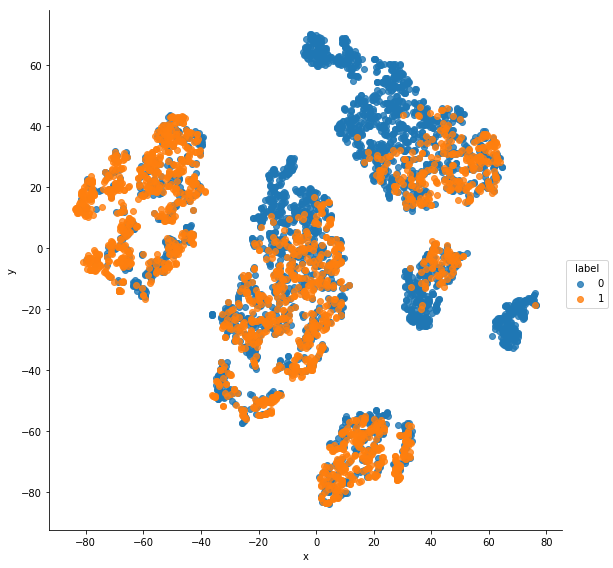

In [105]:
sns.lmplot( data = df1, x='x', y='y', hue='label', fit_reg = False, size = 8 )

plt.show()

## Vectorizing Text data

In [5]:
df = df.fillna('') # Filling NAN cells with <blank space>

df[ df.isnull().any(1) ]

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate, freqQid1, freqQid2, lenQ1, lenQ2, wordQ1, wordQ2, commonWord, totalWords, shareWord, fQ1+fQ2, fQ1-fQ2, cwc_min, cwc_max, csc_min, csc_max, ctc_min, ctc_max, last_word_eq, first_word_eq, abs_len_diff, mean_len, token_set_ratio, token_sort_ratio, fuzz_ratio, fuzz_partial_ratio, longest_substr_ratio]
Index: []

[0 rows x 32 columns]

### Taking 50k data points ( cause XBoost takes > 3 hrs )

In [6]:
df = df[ 0: 50000 ]

In [7]:
questions = list( df['question1'] + df['question2'] ) 
print( len(questions) )

50000


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

tfidf = TfidfVectorizer(lowercase=False )
quesTFIDF = tfidf.fit_transform( questions )

In [9]:
print( type(quesTFIDF) )
quesTFIDF.shape

<class 'scipy.sparse.csr.csr_matrix'>


(50000, 33566)

In [10]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freqQid1', 'freqQid2', 'lenQ1', 'lenQ2', 'wordQ1', 'wordQ2',
       'commonWord', 'totalWords', 'shareWord', 'fQ1+fQ2', 'fQ1-fQ2',
       'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')

In [11]:
data = df
data = data.drop(['id'], axis=1)
data = data.drop(['qid1'], axis=1)
data = data.drop(['qid2'], axis=1)
data = data.drop(['question1'], axis=1)
data = data.drop(['question2'], axis=1)
data =  data.drop(['is_duplicate'], axis=1)

In [12]:
data.head(2)

freqQid1  freqQid2  lenQ1  lenQ2  wordQ1  wordQ2  commonWord  totalWords  \
0         1         1     66     57      14      12        10.0        23.0   
1         4         1     51     88       8      13         4.0        20.0   

   shareWord  fQ1+fQ2          ...            ctc_max  last_word_eq  \
0   0.434783        2          ...           0.785709           0.0   
1   0.200000        5          ...           0.466664           0.0   

   first_word_eq  abs_len_diff  mean_len  token_set_ratio  token_sort_ratio  \
0            1.0           2.0      13.0              100                93   
1            1.0           5.0      12.5               86                63   

   fuzz_ratio  fuzz_partial_ratio  longest_substr_ratio  
0          93                 100              0.982759  
1          66                  75              0.596154  

[2 rows x 26 columns]

In [13]:
import numpy as np
data = np.array( data )

In [14]:
print( data[0:2] )
data.shape

[[  1.           1.          66.          57.          14.
   12.          10.          23.           0.43478261   2.
    0.           0.99998      0.83331944   0.99998333   0.99998333
    0.91665903   0.78570867   0.           1.           2.
   13.         100.          93.          93.         100.
    0.98275862]
 [  4.           1.          51.          88.           8.
   13.           4.          20.           0.2          5.
    3.           0.799984     0.399996     0.74998125   0.599988
    0.699993     0.46666356   0.           1.           5.
   12.5         86.          63.          66.          75.
    0.59615385]]


(50000, 26)

In [15]:
Y = df['is_duplicate']
Y = np.array( Y )
Y.shape

(50000,)

In [16]:
from scipy.sparse import hstack

xdata = hstack((data, quesTFIDF )).tocsr()
ydata = Y

In [17]:
from sklearn.model_selection import train_test_split

xtr, xte, ytr, yte = train_test_split( xdata, ydata, stratify = ydata, test_size=0.3)

In [18]:
print( xtr.shape )
print( xte.shape )
print( ytr.shape )
print( yte.shape )

(35000, 33592)
(15000, 33592)
(35000,)
(15000,)


In [19]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

from datetime import datetime

## Logistic Regression

In [20]:
def BestDS( xtr, ytr, classifier, hyper ):

    tuned_parameters = { hyper : [10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2 ] }


    clf = GridSearchCV( classifier, tuned_parameters, cv=5, scoring='log_loss', n_jobs = -1)
    clf.fit(xtr, ytr)

    print("Best parameters :")
    print()

    print( clf.best_params_ )
    print()

    print("Grid scores :")
    print()

    means = clf.cv_results_['mean_test_score']

    stds = clf.cv_results_['std_test_score']

    for mean, std, params in zip( means, stds, clf.cv_results_['params'] ):

        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

    print()

# Ref : https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

In [21]:
start = datetime.now()

clf = LogisticRegression()
BestDS( xtr, ytr, clf, 'C' )

print("Time taken to run this cell :", datetime.now() - start )

Best parameters :

{'C': 1}

Grid scores :

-0.457 (+/-0.010) for {'C': 0.001}
-0.435 (+/-0.011) for {'C': 0.01}
-0.403 (+/-0.011) for {'C': 0.1}
-0.383 (+/-0.010) for {'C': 1}
-0.413 (+/-0.014) for {'C': 10}
-0.530 (+/-0.051) for {'C': 100}

Time taken to run this cell : 0:02:06.134848


In [22]:
clf = LogisticRegression( C = 1, penalty = 'l2' )
clf.fit( xtr, ytr )

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
predictY = clf.predict_proba( xte )

predictedY = np.argmax( predictY, axis=1 )

[[8295 1110]
 [1735 3860]]


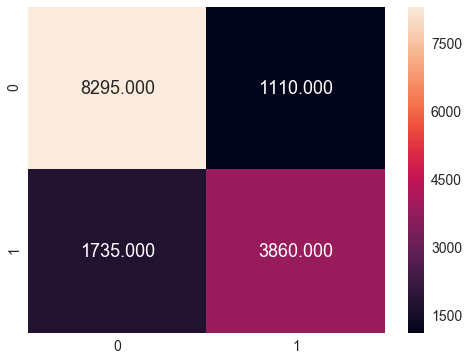

In [26]:
import seaborn as sns

cmte = confusion_matrix( yte, predictedY )
print( cmte )

plt.figure( figsize = (8,6) )
sns.set( font_scale = 1.4 ) #for label size
sns.heatmap( cmte, annot = True, fmt=".3f", annot_kws={"size": 18} )# font size
plt.show()
plt.close()

In [27]:
i =  yte ^ predictedY

print(' % of points correctly classified : ', ( i.shape[0] - i.sum() ) / yte.shape[0] * 100 )

 % of points correctly classified :  81.03333333333333


In [28]:
from sklearn.metrics.classification import accuracy_score, log_loss

log_loss( yte, predictY, labels = clf.classes_, eps = 1e-15 )

0.37854547663716537

Best C = 1

log_loss = 0.3785

% of points correctly classified :  81.03

## Linear SVM

In [29]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

In [30]:
#from sklearn.svm import LinearSVC
from sklearn import linear_model

alpha = [ 10 ** x for x in range(-5, 2) ] # Various value of Hyperparameter

logError = [ ]

for i in alpha :
    classifier = SGDClassifier( alpha = i, penalty = 'l1', loss = 'hinge', random_state = 42, n_jobs = -1) 
    # loss Defaults to ‘hinge’, which gives a linear SVM.
    classifier.fit(xtr, ytr)
    
    # ClaibratedClassifierCV() : Probability calibration with isotonic regression or sigmoid.
    # With this class, the base_estimator is fit on the train set of the cross-validation generator and the ......
    # .... test set is used for calibration. The probabilities for each of the folds are then averaged for prediction
    
    clf = CalibratedClassifierCV( classifier, method="sigmoid" )
    
    # base_estimator : (classifier) The classifier whose output decision func needs to be calibrated to offer more accurate...
    # .... predict_proba outputs. If cv=prefit, the classifier must have been fit already on data.
    
    clf.fit(xtr, ytr)
    predictY = clf.predict_proba( xte )
    
    logError.append( log_loss( yte, predictY, labels = clf.classes_, eps = 1e-15) )
    print('For values of alpha = ', i, " the log loss is : ",log_loss(yte, predictY, labels=clf.classes_, eps=1e-15) )

For values of alpha =  1e-05  the log loss is :  0.47084850814458173
For values of alpha =  0.0001  the log loss is :  0.4819218210171969
For values of alpha =  0.001  the log loss is :  0.48928092667292983
For values of alpha =  0.01  the log loss is :  0.4975218664740168
For values of alpha =  0.1  the log loss is :  0.48754989122277537
For values of alpha =  1  the log loss is :  0.5828581727720278
For values of alpha =  10  the log loss is :  0.6029365939801671


In [31]:
bestA = np.argmin( logError )
clf = SGDClassifier( alpha = alpha[bestA], penalty='l2', loss='log', random_state = 42, n_jobs = -1 )
clf.fit(xtr, ytr)

caliClf = CalibratedClassifierCV( clf, method="sigmoid" )
caliClf.fit(xtr, ytr)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1e-05, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False),
            cv=3, method='sigmoid')

In [32]:
print(' Best alpha : ', alpha[bestA])

predictY = caliClf.predict_proba( xtr )
print(' The train log loss is : ',log_loss( ytr, predictY, labels = clf.classes_, eps = 1e-15) )

predictY = caliClf.predict_proba( xte )
print(' The test log loss is : ',log_loss( yte, predictY, labels = clf.classes_, eps = 1e-15) )


 Best alpha :  1e-05
 The train log loss is :  0.46093631597358786
 The train log loss is :  0.45205138607350526


In [33]:
predictY = caliClf.predict_proba( xte )

predictedY = np.argmax( predictY, axis=1 )

In [34]:
print(len(predictedY))
predictedY

15000


array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

[[8494  911]
 [2521 3074]]


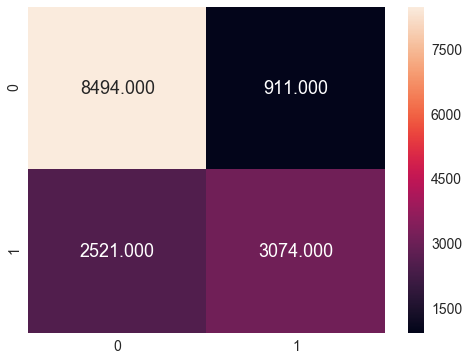

In [35]:
cmte = confusion_matrix( yte, predictedY )
print( cmte )

plt.figure( figsize = (8,6) )
sns.set( font_scale = 1.4 ) #for label size
sns.heatmap( cmte, annot = True, fmt=".3f", annot_kws={"size": 18} )# font size
plt.show()
plt.close()

In [36]:
from sklearn.metrics.classification import accuracy_score, log_loss

log_loss( yte, predictY, labels = clf.classes_, eps = 1e-15 )

0.45205138607350526

In [37]:
i =  yte ^ predictedY

print(' % of points correctly classified : ', ( i.shape[0] - i.sum() ) / yte.shape[0] * 100 )

 % of points correctly classified :  77.12


Best alpha = 0.00001

The train log loss is :  0.4609
    
The test log loss is :  0.4520

% of points correctly classified :  77.12


## XG Boost

In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:
import xgboost as xgb

start = datetime.now()

classifier = xgb.XGBClassifier( objective = "binary:logistic", random_state = 42 )

parameters = {'max_depth': [ 1, 5, 10, 50, 100, 500 ], 'learning_rate': [ 0.01, 0.1, 0 , 1  ]}


clf = RandomizedSearchCV( classifier, parameters, cv=5, scoring='log_loss', n_jobs = -1 )
clf.fit(xtr, ytr)

print("Best parameters :")
print()

print( clf.best_params_ )
print()

print("Grid scores :")
print()

means = clf.cv_results_['mean_test_score']

stds = clf.cv_results_['std_test_score']

for mean, std, params in zip( means, stds, clf.cv_results_['params'] ):

    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

print()

print("Time taken to run this cell :", datetime.now() - start )

Best parameters :

{'max_depth': 1, 'learning_rate': 1}

Grid scores :

-0.693 (+/-0.000) for {'max_depth': 5, 'learning_rate': 0}
-0.445 (+/-0.010) for {'max_depth': 10, 'learning_rate': 0.01}
-0.423 (+/-0.012) for {'max_depth': 1, 'learning_rate': 0.1}
-0.602 (+/-0.037) for {'max_depth': 100, 'learning_rate': 1}
-0.599 (+/-0.042) for {'max_depth': 50, 'learning_rate': 1}
-0.693 (+/-0.000) for {'max_depth': 10, 'learning_rate': 0}
-0.375 (+/-0.020) for {'max_depth': 500, 'learning_rate': 0.1}
-0.392 (+/-0.015) for {'max_depth': 5, 'learning_rate': 1}
-0.693 (+/-0.000) for {'max_depth': 1, 'learning_rate': 0}
-0.374 (+/-0.015) for {'max_depth': 1, 'learning_rate': 1}

Time taken to run this cell : 0:33:49.488650


In [ ]:
# data_matrix = xgb.DMatrix( data=X, label=y )
# We convert the dataset into an optimized data structure called Dmatrix that XGBoost supports 
# This gives it acclaimed performance and efficiency gains. 

dTrain = xgb.DMatrix( data = xtr, label = ytr )
dTest = xgb.DMatrix( data = xte, label = yte )

In [54]:
start = datetime.now()

param = {'max_depth': 1, 'eta':1 , 'silent':1, 'objective':'binary:logistic', 'eval_metric':'logloss'}
# eta : control the learning rate: scale the contribution of each tree by a factor of 0 < eta < 1

watchlist = [(dTrain, 'train'), (dTest, 'test') ]

# xgb.train is an advanced interface for training an xgboost model. The xgboost function is a simpler wrapper for xgb.train.

model = xgb.train( param, dTrain, 400, watchlist, early_stopping_rounds = 30,  verbose_eval = 10 )

# nrounds : (400) max number of boosting iterations.
# watchlist : named list of xgb.DMatrix datasets to use for evaluating model performance
# early_stopping_rounds = k : training with a validation set will stop if the performance doesn't improve for k rounds
# verbose_eval : ( 10 ) display evaluation after 10 steps

print("Time taken to run this cell :", datetime.now() - start )

# Ref : https://rdrr.io/cran/xgboost/man/xgb.train.html

[0]	train-logloss:0.564678	test-logloss:0.556442
Multiple eval metrics have been passed: 'test-logloss' will be used for early stopping.

Will train until test-logloss hasn't improved in 30 rounds.
[10]	train-logloss:0.423134	test-logloss:0.418101
[20]	train-logloss:0.402122	test-logloss:0.399656
[30]	train-logloss:0.390538	test-logloss:0.389415
[40]	train-logloss:0.382817	test-logloss:0.382443
[50]	train-logloss:0.376972	test-logloss:0.377865
[60]	train-logloss:0.372317	test-logloss:0.375716
[70]	train-logloss:0.36782	test-logloss:0.371804
[80]	train-logloss:0.364257	test-logloss:0.370452
[90]	train-logloss:0.360923	test-logloss:0.369469
[100]	train-logloss:0.357529	test-logloss:0.366767
[110]	train-logloss:0.354668	test-logloss:0.36433
[120]	train-logloss:0.351869	test-logloss:0.362784
[130]	train-logloss:0.349173	test-logloss:0.360918
[140]	train-logloss:0.346981	test-logloss:0.360327
[150]	train-logloss:0.344777	test-logloss:0.359547
[160]	train-logloss:0.342698	test-logloss:0.3586

In [48]:
predictY = model.predict( dTest )
print(" The test log loss is : ",log_loss( yte, predictY, labels = clf.classes_, eps=1e-15))

 The test log loss is :  0.35484014698795174


In [50]:
predictY

array([5.7544523e-01, 9.4474965e-01, 8.2181359e-05, ..., 3.8734299e-01,
       9.7065657e-01, 8.9276356e-01], dtype=float32)

In [51]:
predictedY = np.array( predictY > 0.5 , dtype = int )
predictedY

array([1, 1, 0, ..., 0, 1, 1])

[[8218 1187]
 [1505 4090]]


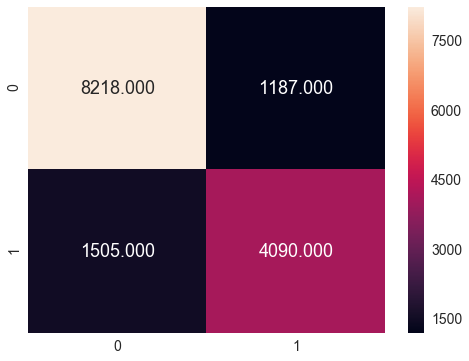

In [52]:
cmte = confusion_matrix( yte, predictedY )
print( cmte )

plt.figure( figsize = (8,6) )
sns.set( font_scale = 1.4 ) #for label size
sns.heatmap( cmte, annot = True, fmt=".3f", annot_kws={"size": 18} )# font size
plt.show()
plt.close()

In [53]:
i =  yte ^ predictedY

print(' % of points correctly classified : ', ( i.shape[0] - i.sum() ) / yte.shape[0] * 100 )

 % of points correctly classified :  82.05333333333333


In [59]:
from prettytable import PrettyTable
    
x = PrettyTable()


x.field_names = [ " Model ", " Tuning Techinque ", " Log loss ", " % Correctly Classified points " ]

x.add_row( [ " Logistic Regression ", " GridSearchCV ", " 0.3785 ", " 81.03 % " ] )
x.add_row( [ " Linear SVM ", " for loop and CalibratedClassifierCV ", " 0.4520 ", " 77.12 % "] )
x.add_row( [ " XG Boost ", " RandomizedSearchCV ",  "  0.3548  ", " 82.05 % " ] )

print( x )

# Ref : http://zetcode.com/python/prettytable/

+-----------------------+---------------------------------------+------------+---------------------------------+
|         Model         |            Tuning Techinque           |  Log loss  |  % Correctly Classified points  |
+-----------------------+---------------------------------------+------------+---------------------------------+
|  Logistic Regression  |              GridSearchCV             |   0.3785   |             81.03 %             |
|       Linear SVM      |  for loop and CalibratedClassifierCV  |   0.4520   |             77.12 %             |
|        XG Boost       |           RandomizedSearchCV          |   0.3548   |             82.05 %             |
+-----------------------+---------------------------------------+------------+---------------------------------+
